<a href="https://colab.research.google.com/github/2303A52191/GENERATIVE_AI_2025/blob/main/GEN_AI_ASSIGNMENT_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5082 - loss: 0.7021 - val_accuracy: 0.5469 - val_loss: 0.6892
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5282 - loss: 0.6975 - val_accuracy: 0.5469 - val_loss: 0.6891
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5393 - loss: 0.6943 - val_accuracy: 0.5469 - val_loss: 0.6890
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5344 - loss: 0.6960 - val_accuracy: 0.5469 - val_loss: 0.6890
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5106 - loss: 0.7012 - val_accuracy: 0.5469 - val_loss: 0.6889
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5198 - loss: 0.6958 - val_accuracy: 0.5469 - val_loss: 0.6888
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5335 - loss: 0.6950 - val_accuracy: 0.5469 - val_loss: 0.6887
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5280 - loss: 0.6970 - val_accuracy: 0.5469 - 

Confusion Matrix:
 [[  3 138]
 [  5 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.02      0.04       141
           1       0.56      0.97      0.71       179

    accuracy                           0.55       320
   macro avg       0.47      0.50      0.37       320
weighted avg       0.48      0.55      0.41       320

Model saved as wine_quality_ann.h5


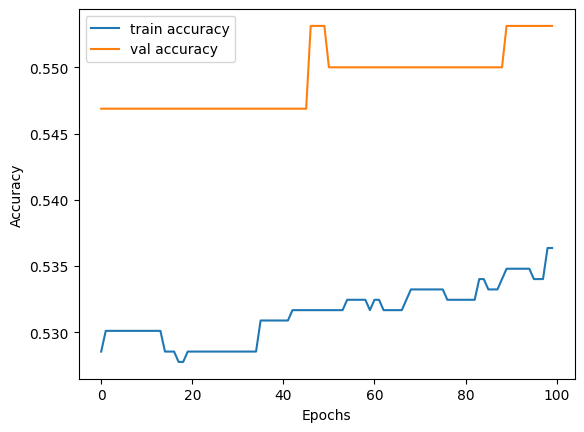

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

dataset_path = "/content/winequality-red.csv"
df = pd.read_csv(dataset_path)

df = df.dropna()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

threshold = 6
y = (y >= threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

model.save("wine_quality_ann.h5")
print("Model saved as wine_quality_ann.h5")

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()